<a href="https://colab.research.google.com/github/PraneethVasa/Nykaa-Chrun-Prediction/blob/main/Copy_of_Nyka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
"""df1 = pd.read_csv(r'/content/Customer_Demographics_.csv')
df2 = pd.read_csv(r'/content/salesdata.csv')
df3 = pd.read_csv(r'/content/customerfeedback.csv')
df4 = pd.read_csv(r'/content/engagementmetrics.csv.csv')
df5 = pd.read_csv(r'/content/churnIndicators.csv')


merged_df = df1.merge(df2, on='CustomerID', how='outer') \
               .merge(df3, on='CustomerID', how='outer') \
               .merge(df4, on='CustomerID', how='outer') \
               .merge(df5, on='CustomerID', how='outer')


merged_df.to_csv('Nykaa_dataset.csv', index=False)

print(merged_df.head())"""


"df1 = pd.read_csv(r'/content/Customer_Demographics_.csv')\ndf2 = pd.read_csv(r'/content/salesdata.csv')\ndf3 = pd.read_csv(r'/content/customerfeedback.csv')\ndf4 = pd.read_csv(r'/content/engagementmetrics.csv.csv')\ndf5 = pd.read_csv(r'/content/churnIndicators.csv')\n\n\nmerged_df = df1.merge(df2, on='CustomerID', how='outer')                .merge(df3, on='CustomerID', how='outer')                .merge(df4, on='CustomerID', how='outer')                .merge(df5, on='CustomerID', how='outer')\n\n\nmerged_df.to_csv('Nykaa_dataset.csv', index=False)\n\nprint(merged_df.head())"

In [2]:
df = pd.read_csv(r'/content/customer_churn_dataset-training-master.csv')

In [3]:
df.head()

CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.0

## ***Identifying Missing Values***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [5]:
df.describe()

CustomerID            Age         Tenure  Usage Frequency  \
count  440832.000000  440832.000000  440832.000000    440832.000000   
mean   225398.667955      39.373153      31.256336        15.807494   
std    129531.918550      12.442369      17.255727         8.586242   
min         2.000000      18.000000       1.000000         1.000000   
25%    113621.750000      29.000000      16.000000         9.000000   
50%    226125.500000      39.000000      32.000000        16.000000   
75%    337739.250000      48.000000      46.000000        23.000000   
max    449999.000000      65.000000      60.000000        30.000000   

       Support Calls  Payment Delay    Total Spend  Last Interaction  \
count  440832.000000  440832.000000  440832.000000     440832.000000   
mean        3.604437      12.965722     631.616223         14.480868   
std         3.070218       8.258063     240.803001          8.596208   
min         0.000000       0.000000     100.000000          1.000000   
25%         1.000000       6.000000     480.000000          7.000000   
50%         3.000000      12.000000     661.000000         14.000000   
75%         6.000000      19.000000     830.000000         22.000000   
max        10.000000      30.000000    1000.000000         30.000000   

               Churn  
count  440832.000000  
mean        0.567107  
std         0.495477  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

In [6]:
Numeric_df = df.select_dtypes(include='number')
Numeric_df

CustomerID   Age  Tenure  Usage Frequency  Support Calls  \
0              2.0  30.0    39.0             14.0            5.0   
1              3.0  65.0    49.0              1.0           10.0   
2              4.0  55.0    14.0              4.0            6.0   
3              5.0  58.0    38.0             21.0            7.0   
4              6.0  23.0    32.0             20.0            5.0   
...            ...   ...     ...              ...            ...   
440828    449995.0  42.0    54.0             15.0            1.0   
440829    449996.0  25.0     8.0             13.0            1.0   
440830    449997.0  26.0    35.0             27.0            1.0   
440831    449998.0  28.0    55.0             14.0            2.0   
440832    449999.0  31.0    48.0             20.0            1.0   

        Payment Delay  Total Spend  Last Interaction  Churn  
0                18.0       932.00              17.0    1.0  
1                 8.0       557.00               6.0    1.0  
2                18.0       185.00               3.0    1.0  
3                 7.0       396.00              29.0    1.0  
4                 8.0       617.00              20.0    1.0  
...               ...          ...               ...    ...  
440828            3.0       716.38               8.0    0.0  
440829           20.0       745.38               2.0    0.0  
440830            5.0       977.31               9.0    0.0  
440831            0.0       602.55               2.0    0.0  
440832           14.0       567.77              21.0    0.0  

[440833 rows x 9 columns]

In [7]:
Numeric_df.corr()

CustomerID       Age    Tenure  Usage Frequency  \
CustomerID          1.000000 -0.181977  0.044129         0.038455   
Age                -0.181977  1.000000 -0.011630        -0.007190   
Tenure              0.044129 -0.011630  1.000000        -0.026800   
Usage Frequency     0.038455 -0.007190 -0.026800         1.000000   
Support Calls      -0.482894  0.158451 -0.027640        -0.022013   
Payment Delay      -0.262029  0.061738 -0.016588        -0.014470   
Total Spend         0.359289 -0.084684  0.019006         0.018631   
Last Interaction   -0.125356  0.028980 -0.006903        -0.004662   
Churn              -0.839365  0.218394 -0.051919        -0.046101   

                  Support Calls  Payment Delay  Total Spend  Last Interaction  \
CustomerID            -0.482894      -0.262029     0.359289         -0.125356   
Age                    0.158451       0.061738    -0.084684          0.028980   
Tenure                -0.027640      -0.016588     0.019006         -0.006903   
Usage Frequency       -0.022013      -0.014470     0.018631         -0.004662   
Support Calls          1.000000       0.162889    -0.221594          0.077684   
Payment Delay          0.162889       1.000000    -0.121044          0.042708   
Total Spend           -0.221594      -0.121044     1.000000         -0.056890   
Last Interaction       0.077684       0.042708    -0.056890          1.000000   
Churn                  0.574267       0.312129    -0.429355          0.149616   

                     Churn  
CustomerID       -0.839365  
Age               0.218394  
Tenure           -0.051919  
Usage Frequency  -0.046101  
Support Calls     0.574267  
Payment Delay     0.312129  
Total Spend      -0.429355  
Last Interaction  0.149616  
Churn             1.000000

In [8]:
Categorical_df = df.select_dtypes(exclude='number')

Categorical_df

Gender Subscription Type Contract Length
0       Female          Standard          Annual
1       Female             Basic         Monthly
2       Female             Basic       Quarterly
3         Male          Standard         Monthly
4         Male             Basic         Monthly
...        ...               ...             ...
440828    Male           Premium          Annual
440829  Female           Premium          Annual
440830    Male          Standard       Quarterly
440831    Male          Standard       Quarterly
440832    Male           Premium       Quarterly

[440833 rows x 3 columns]

In [9]:
data = df
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

## ***Univariate analysis for numerical columns***

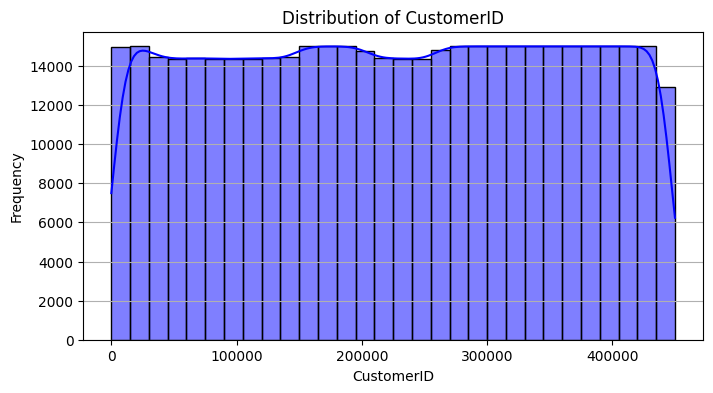

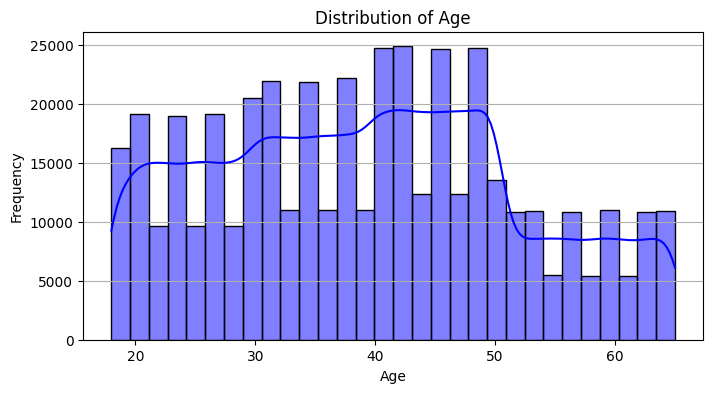

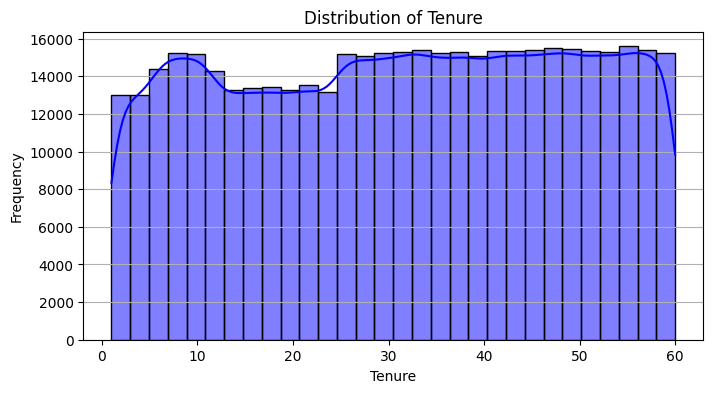

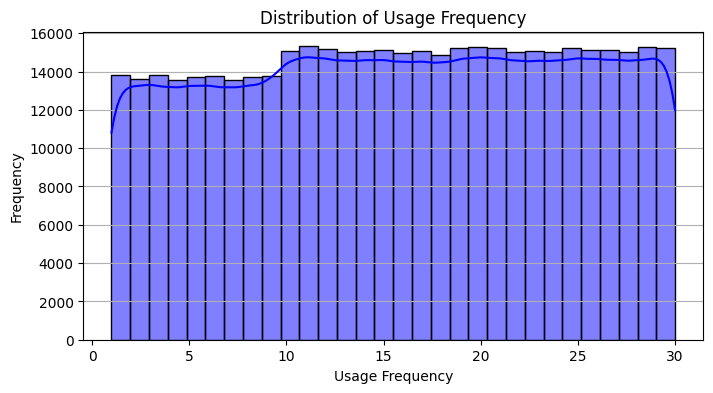

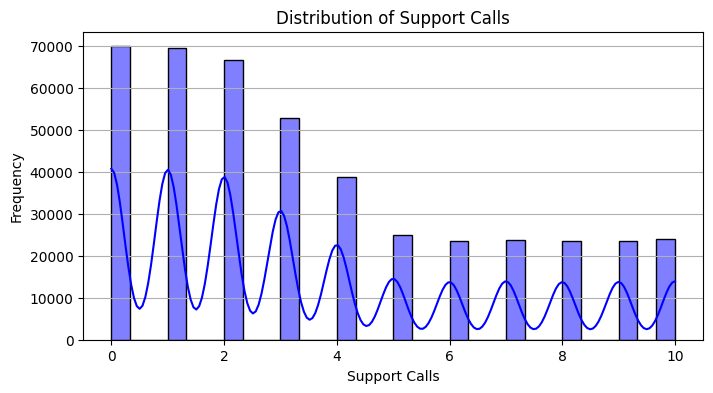

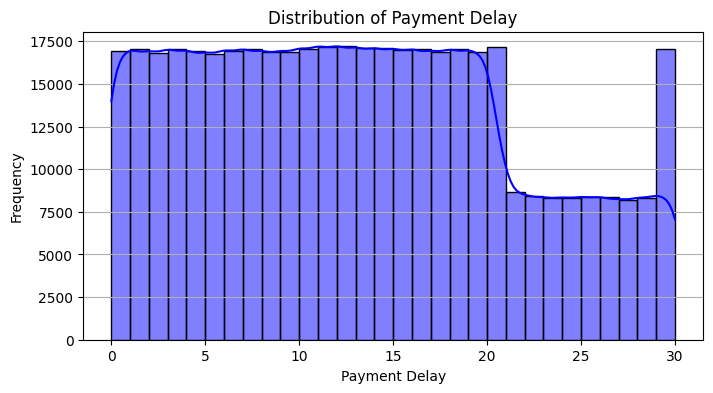

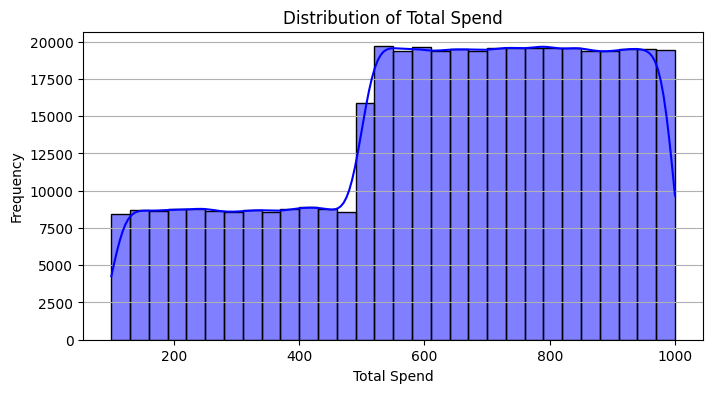

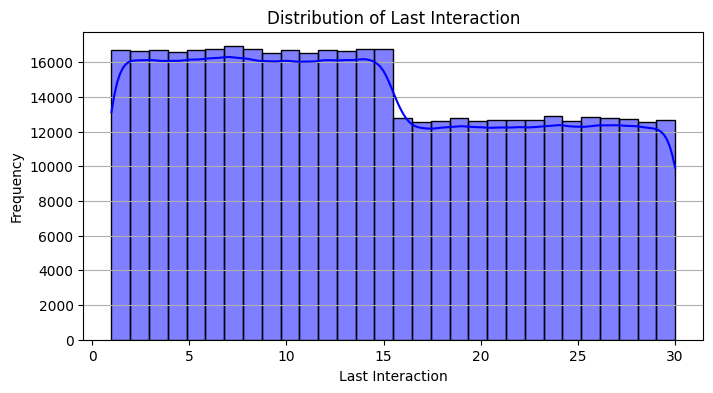

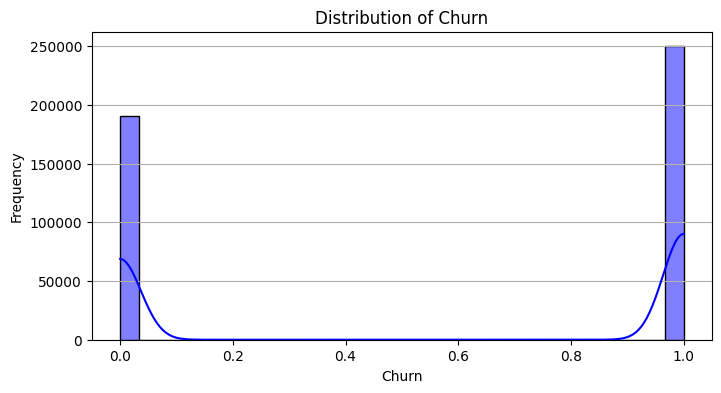

In [10]:
# Define columns by type


for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()
    print("\n\n")

## ***Univariate analysis for categorical columns***

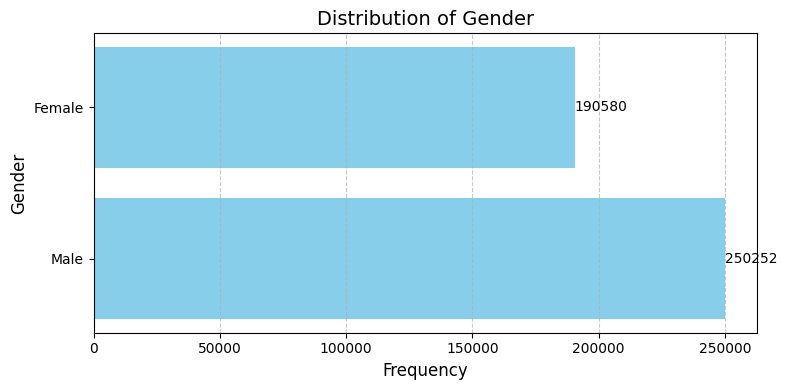

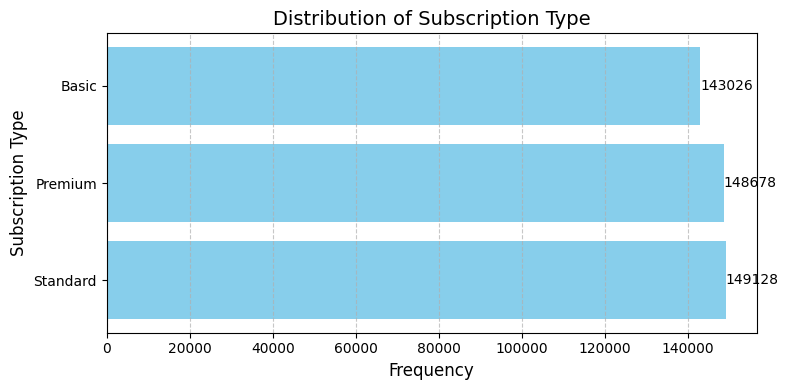

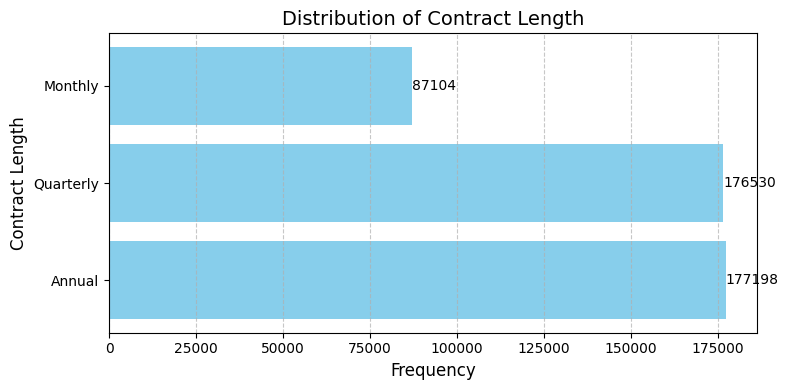

In [11]:
# Loop through all categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))

    # Calculate value counts for the column
    value_counts = data[col].value_counts()

    # Create a bar plot using Matplotlib
    plt.barh(value_counts.index, value_counts.values, color='skyblue')

    # Add labels and title
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel(col, fontsize=12)

    # Display value annotations on bars
    for i, v in enumerate(value_counts.values):
        plt.text(v + 1, i, str(v), color='black', va='center', fontsize=10)

    # Grid and layout adjustments
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print("\n\n")

## ***Bivariate Analysis - Numeric vs Numeric (Correlation and Scatter Plot)***

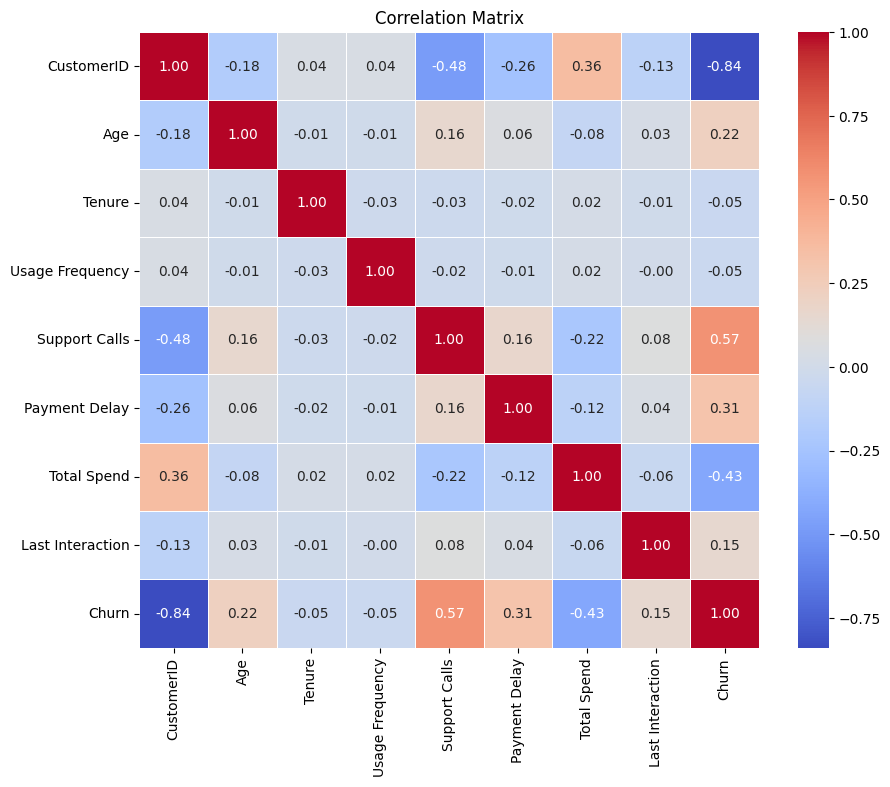

In [12]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

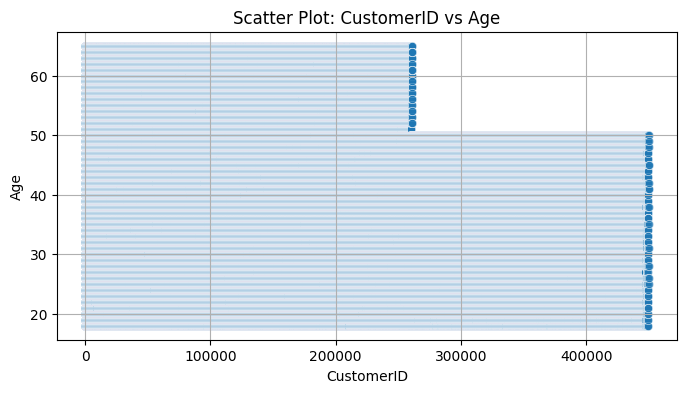

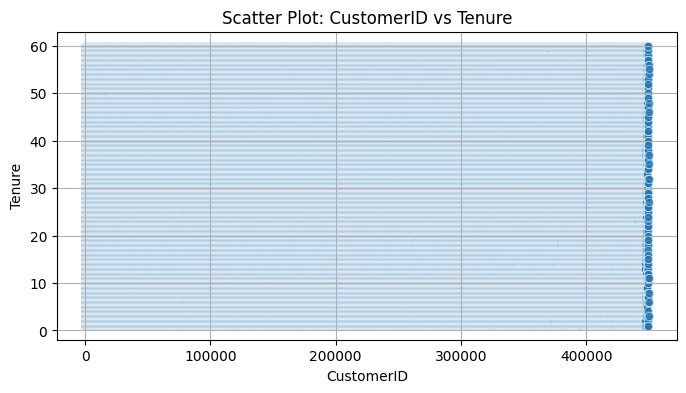

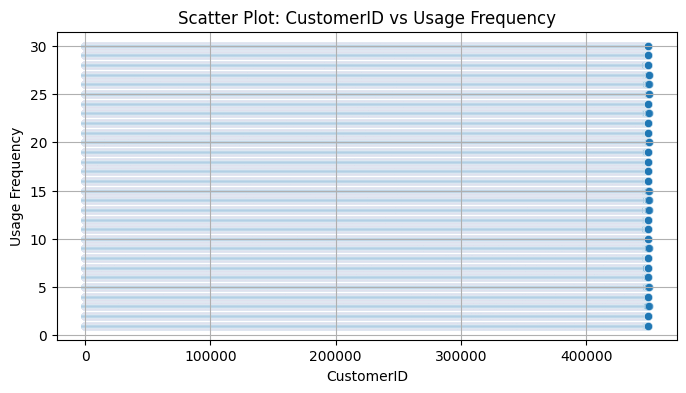

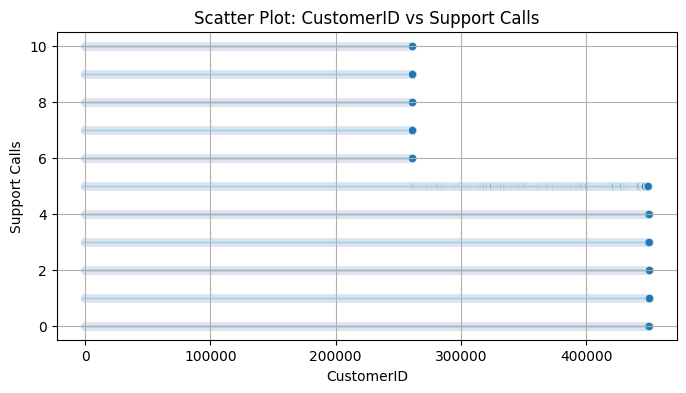

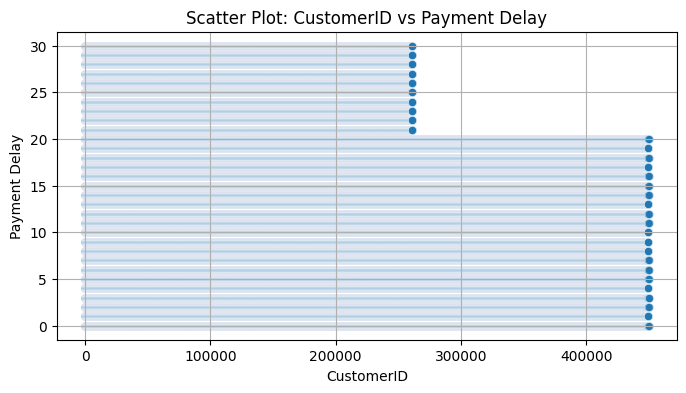

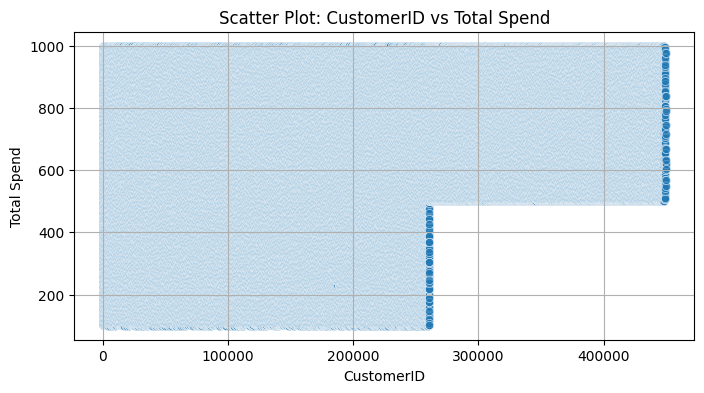

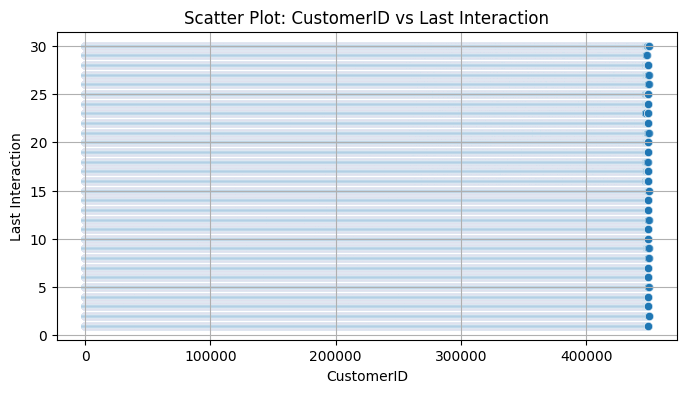

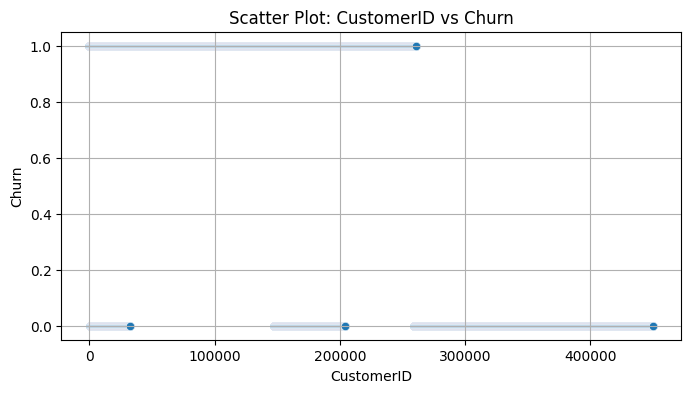

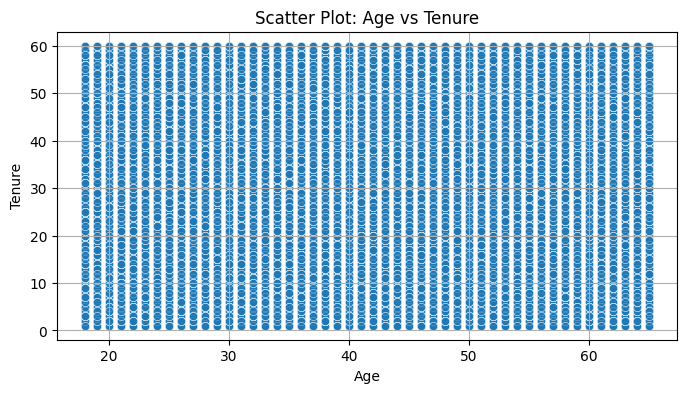

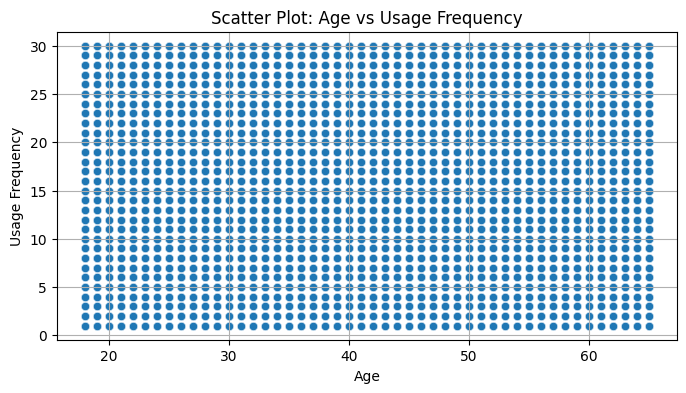

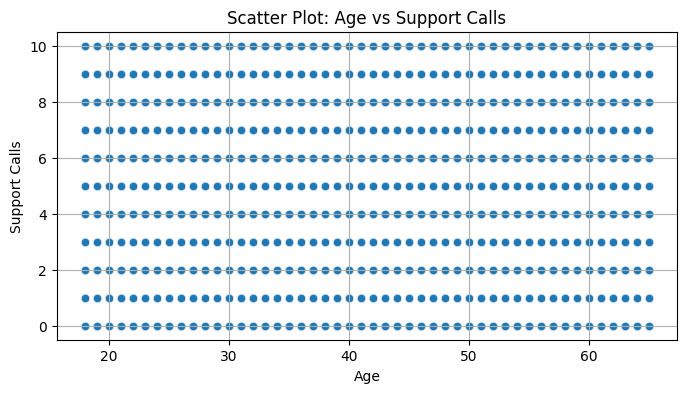

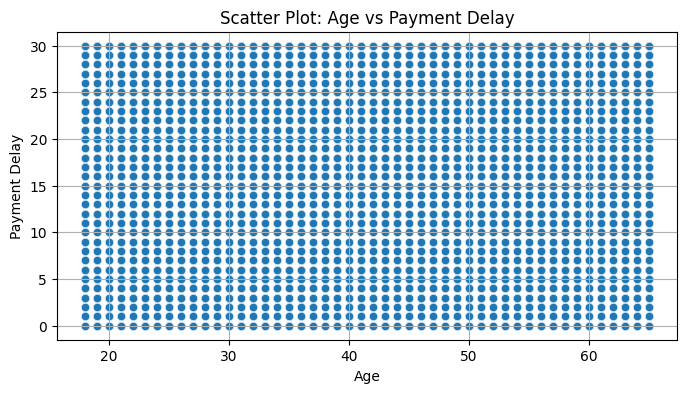

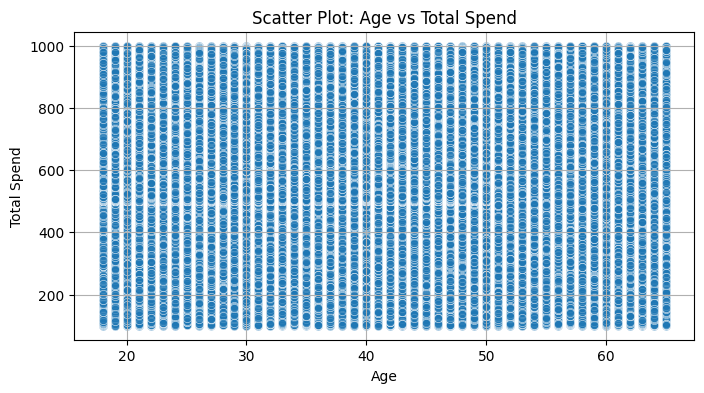

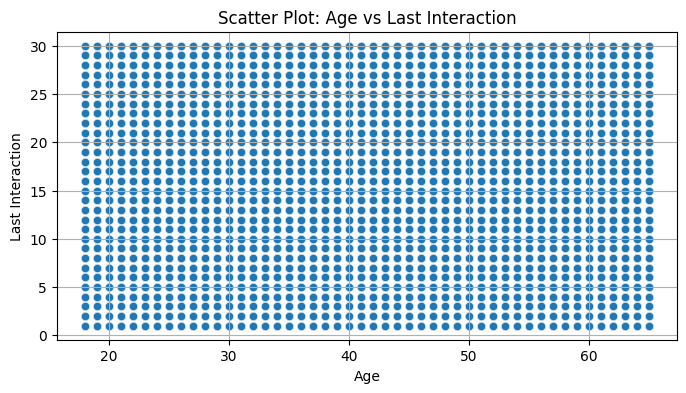

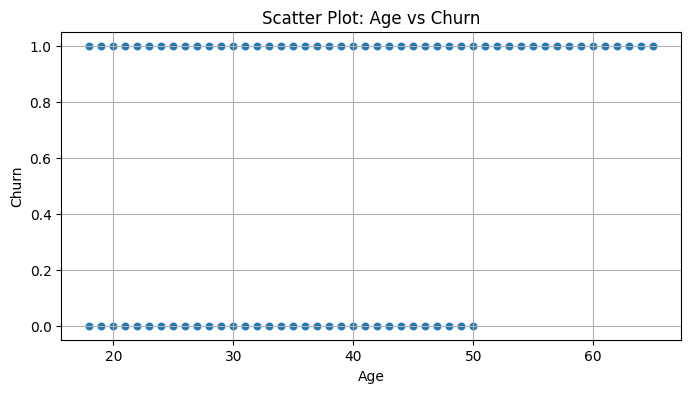

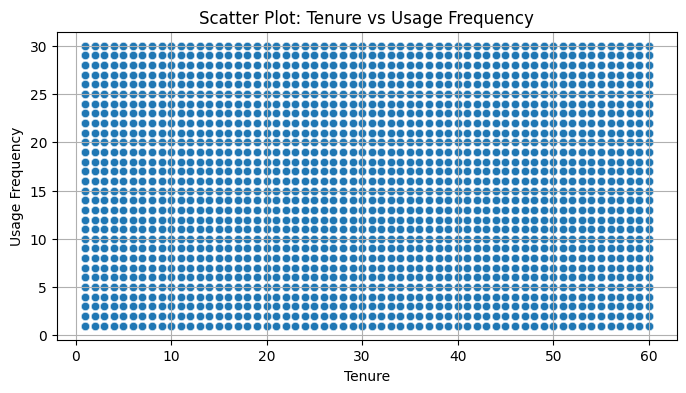

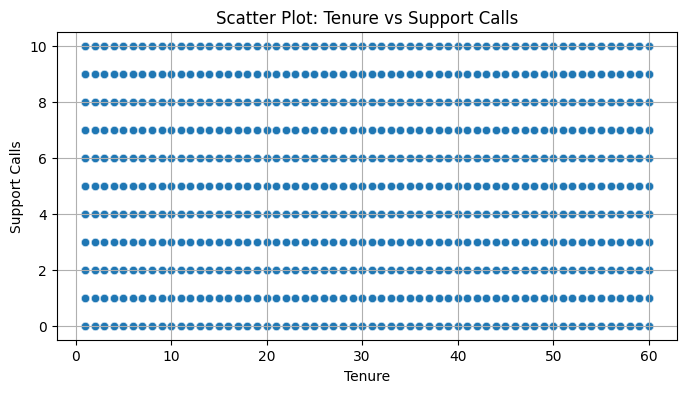

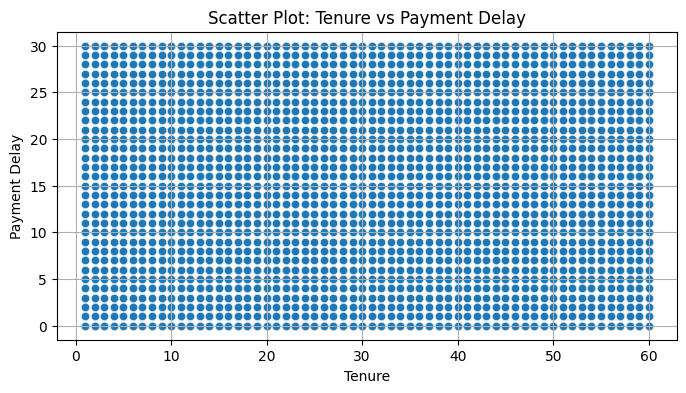

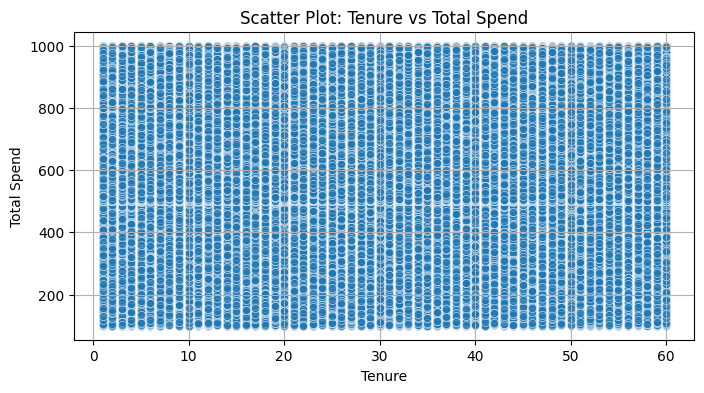

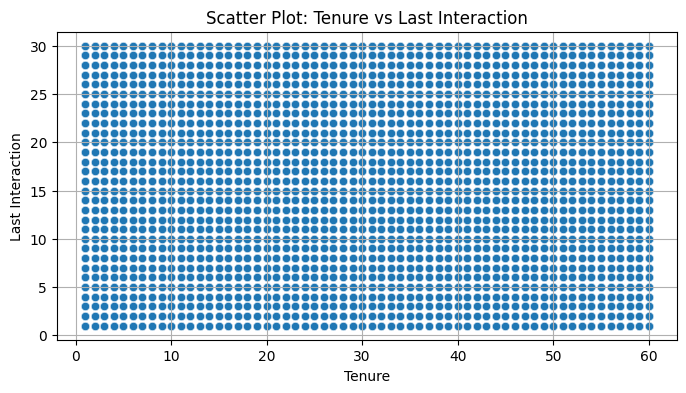

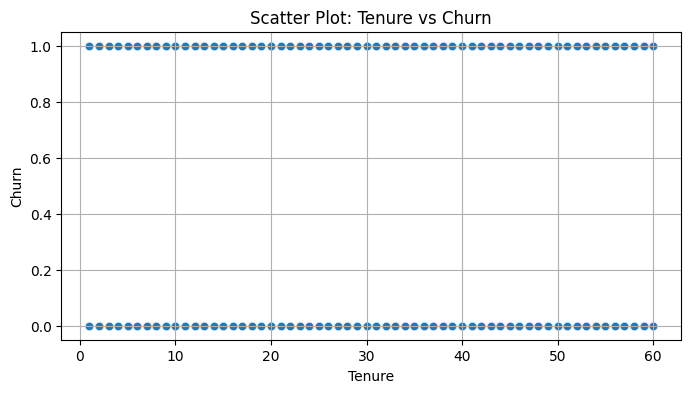

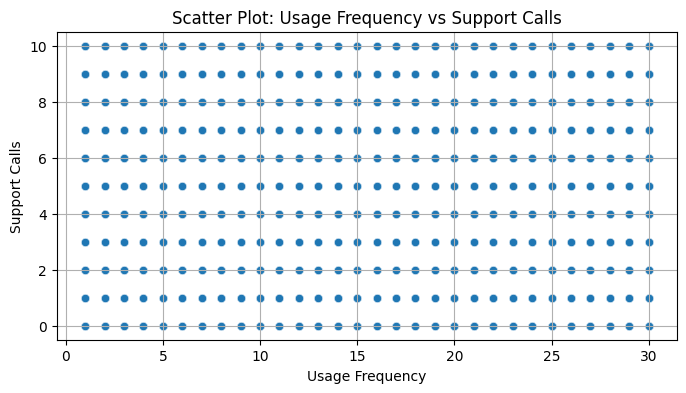

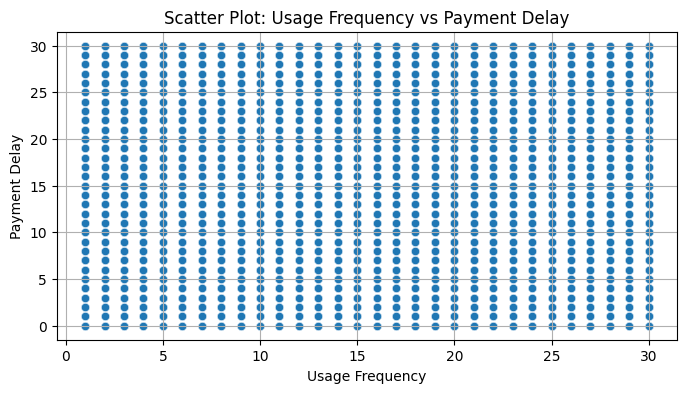

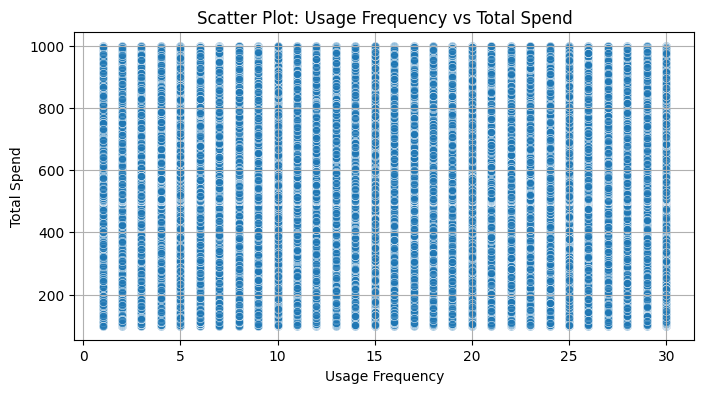

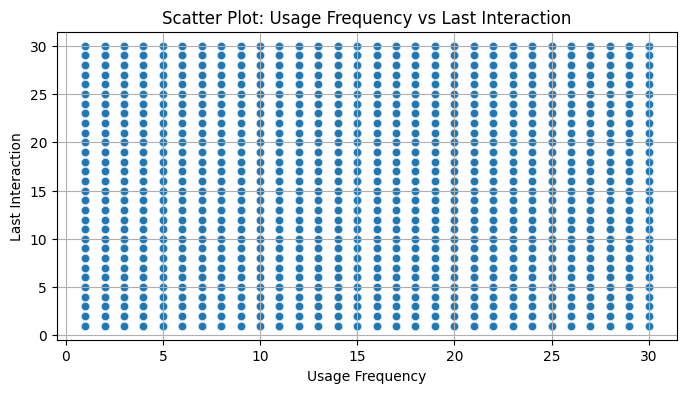

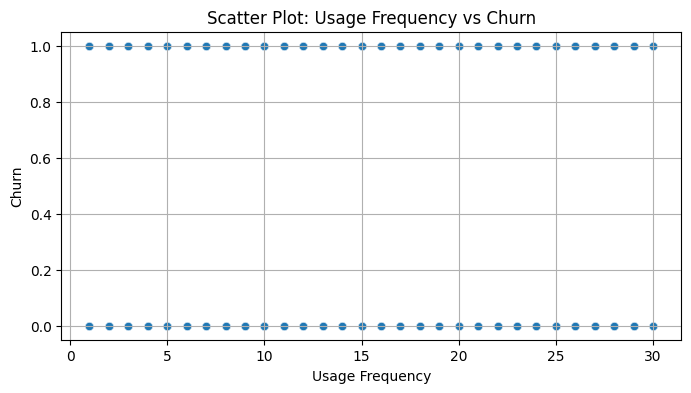

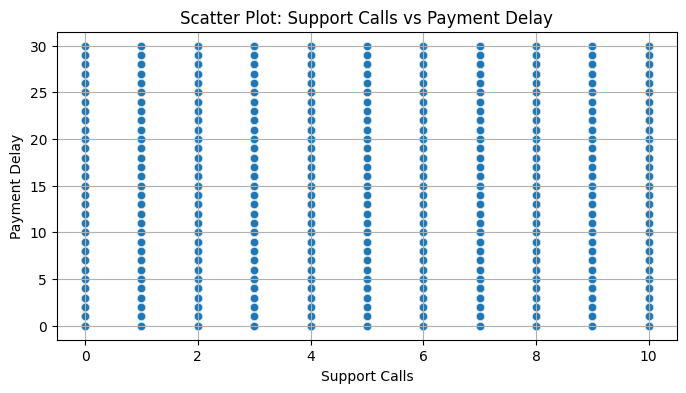

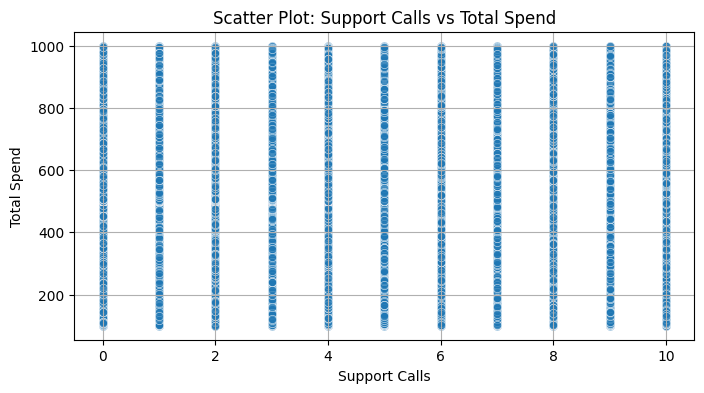

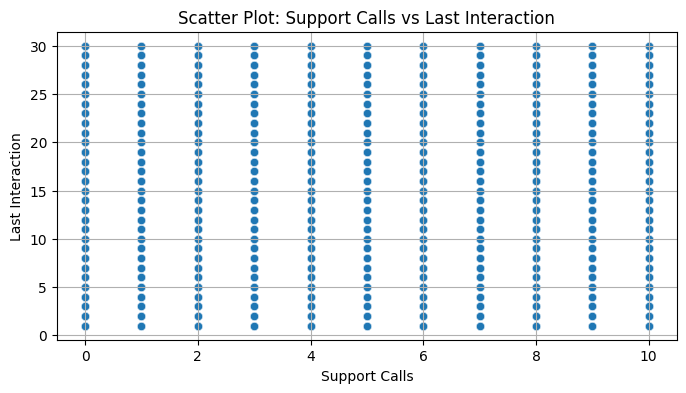

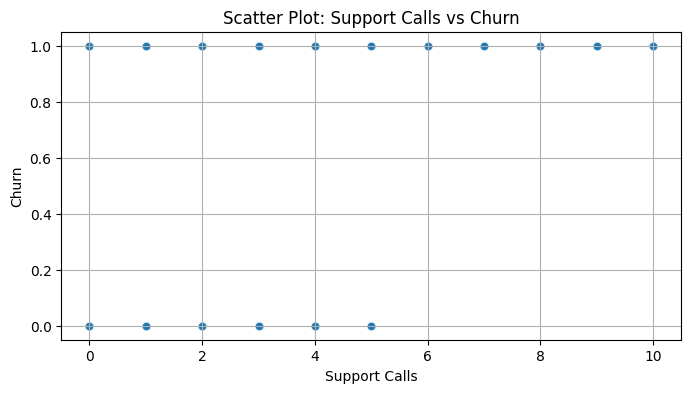

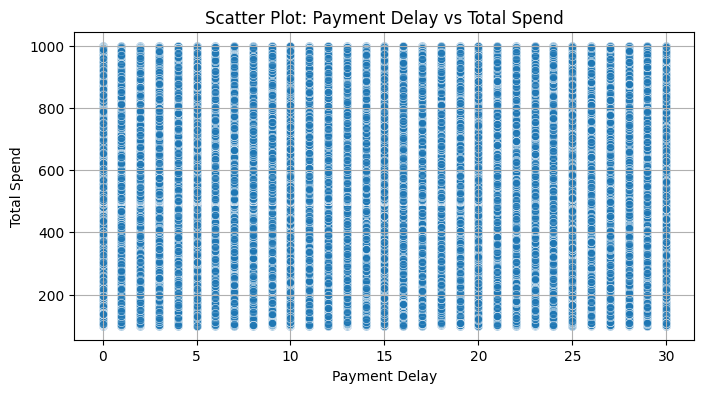

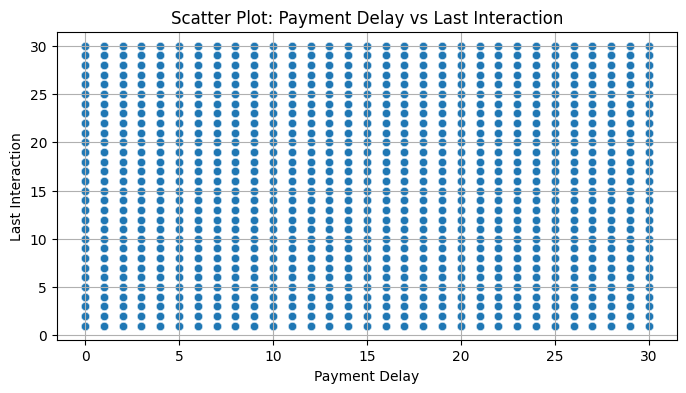

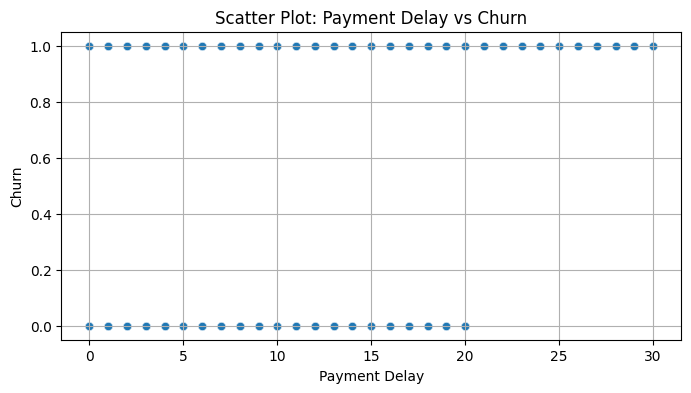

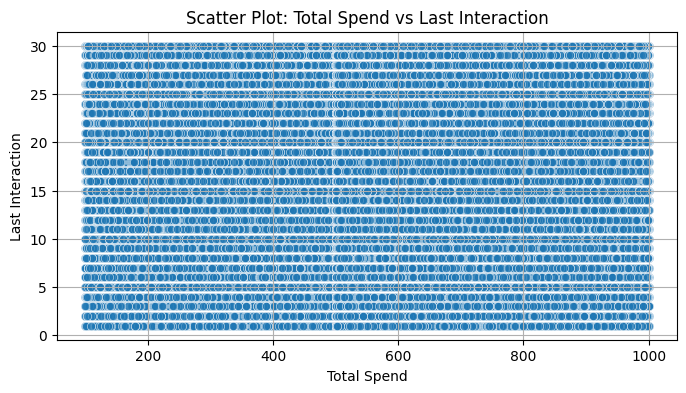

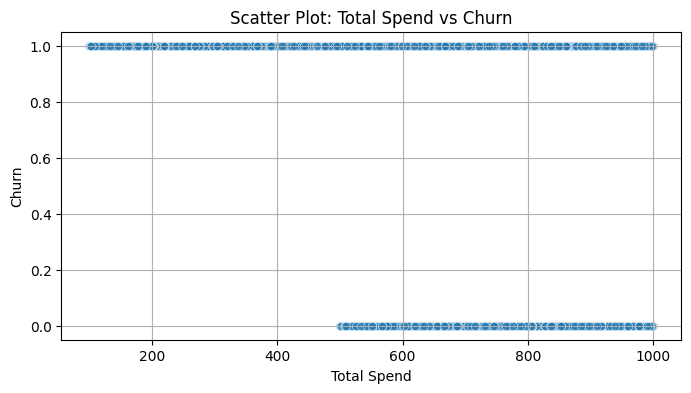

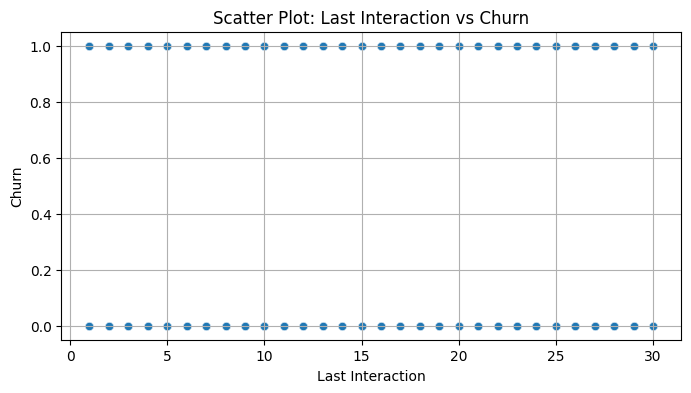

In [13]:
# Scatter plots for each pair of numeric columns
for i, col1 in enumerate(numeric_cols):
    for col2 in numeric_cols[i + 1:]:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=data[col1], y=data[col2], alpha=0.7)
        plt.title(f'Scatter Plot: {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.grid(True)
        plt.show()

## ***Bivariate Analysis - Categorical vs Numeric (Box Plot)***

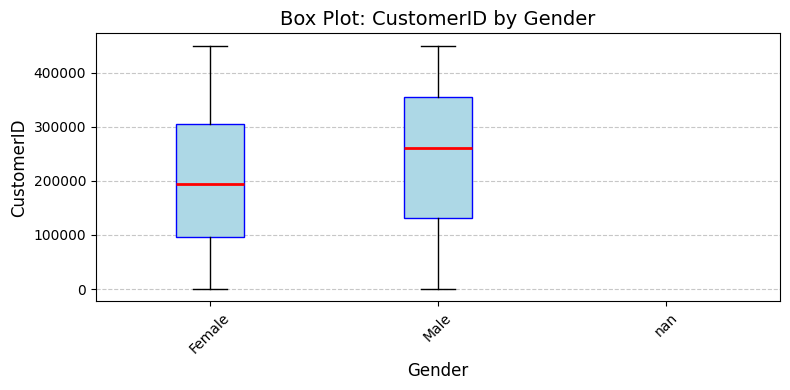

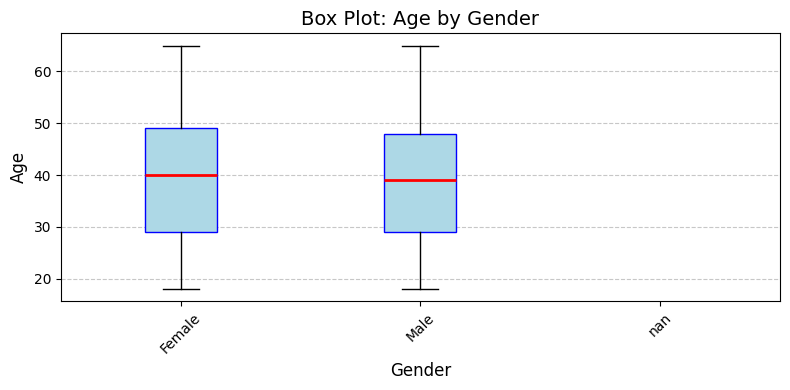

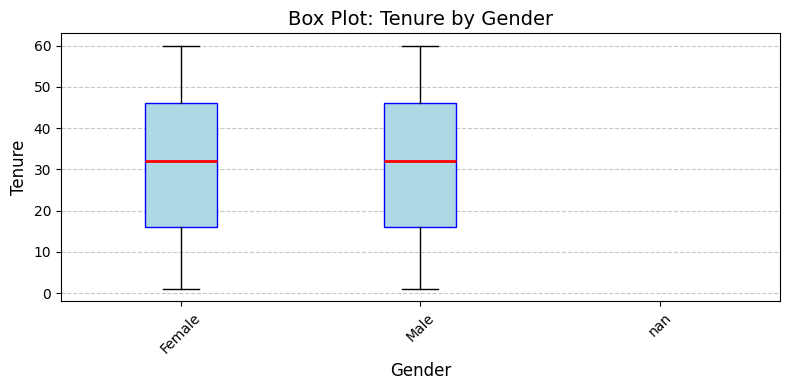

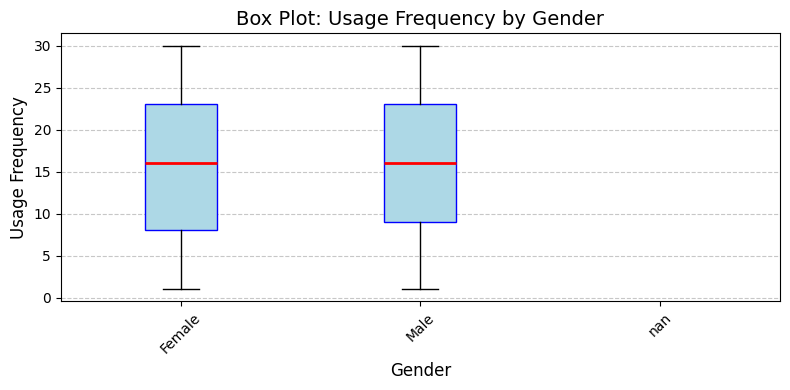

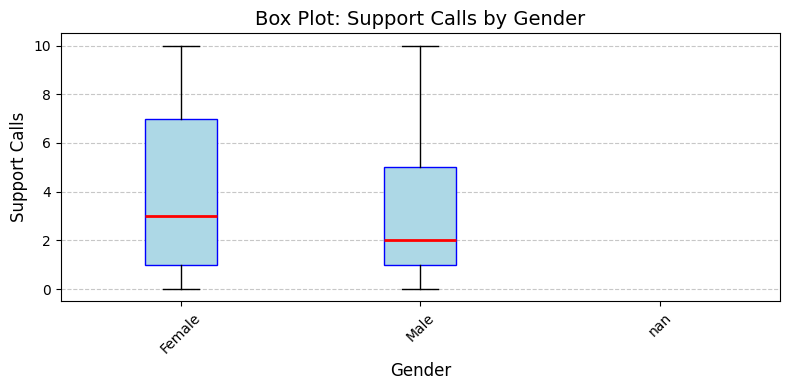

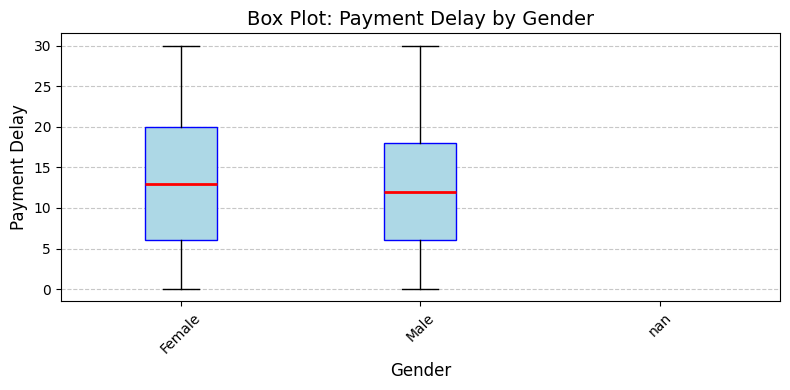

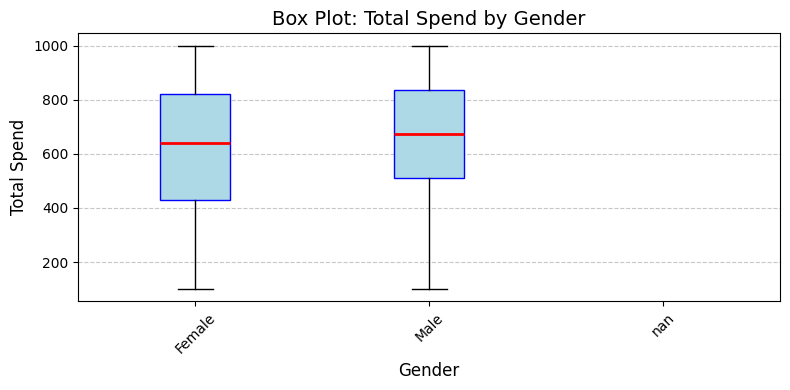

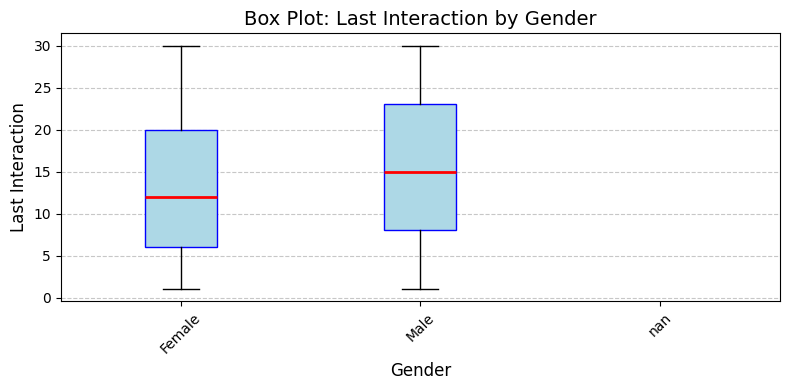

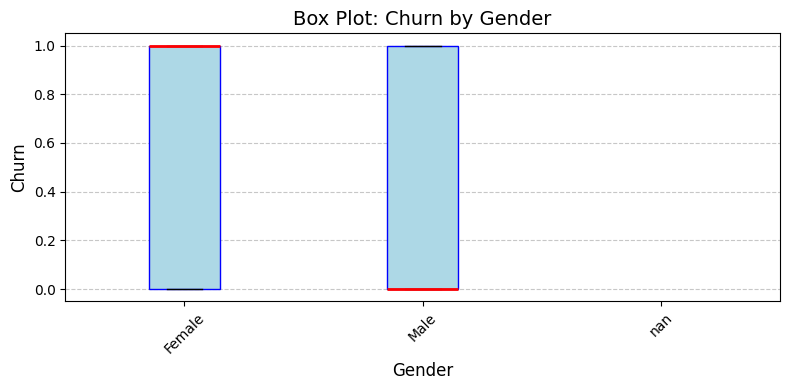

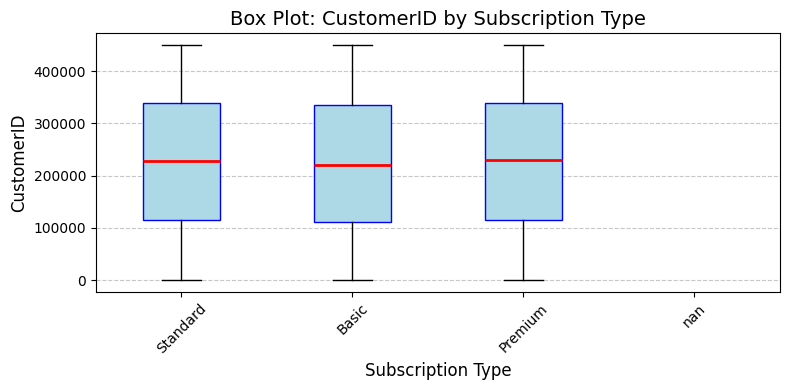

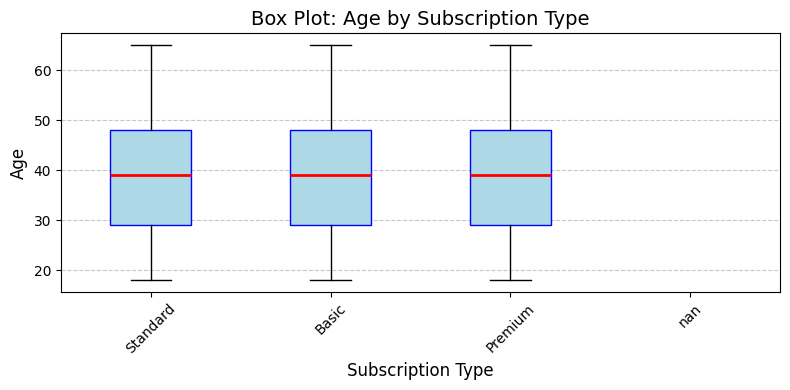

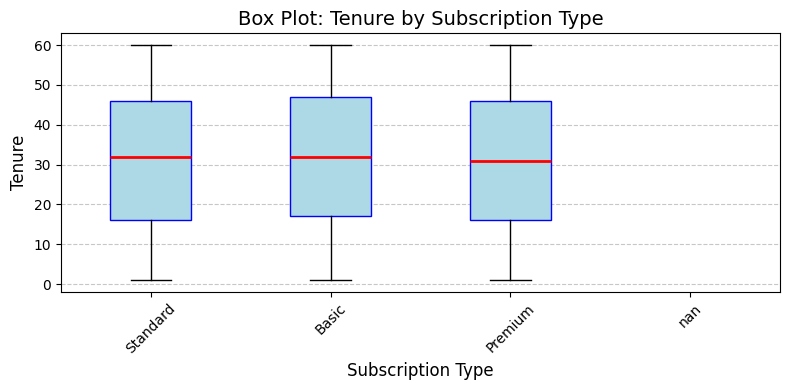

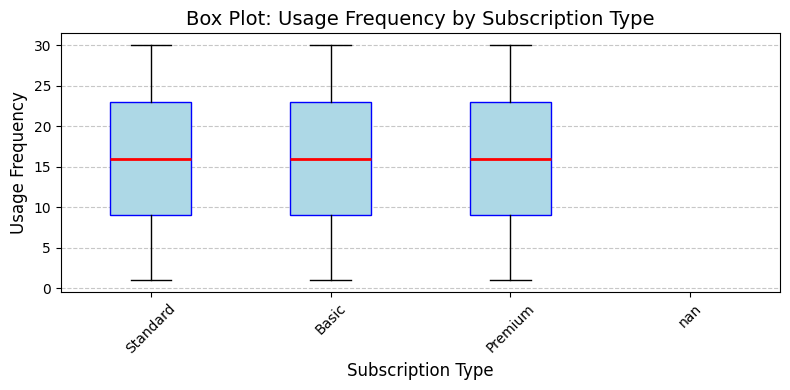

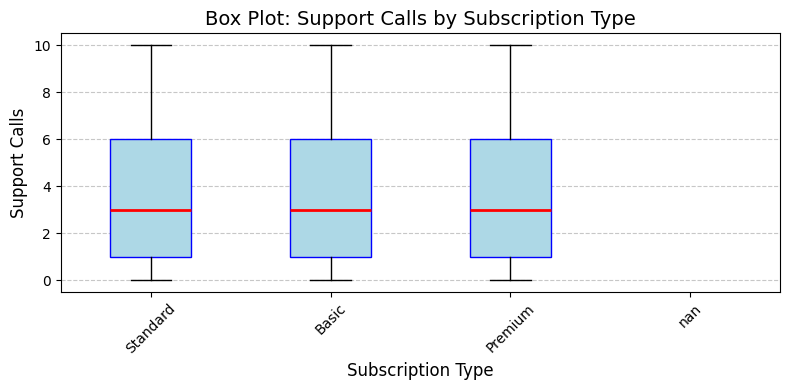

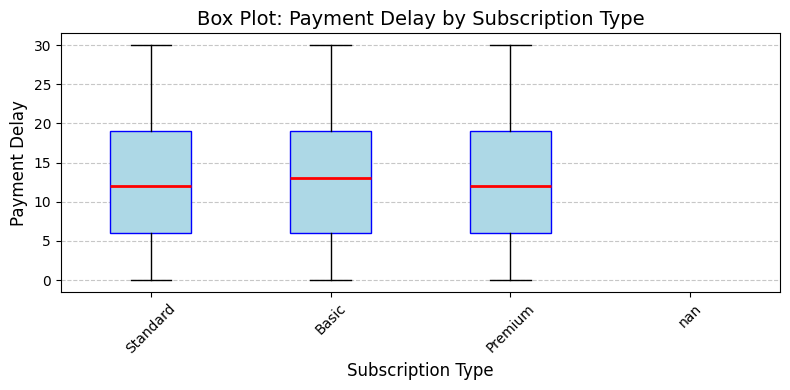

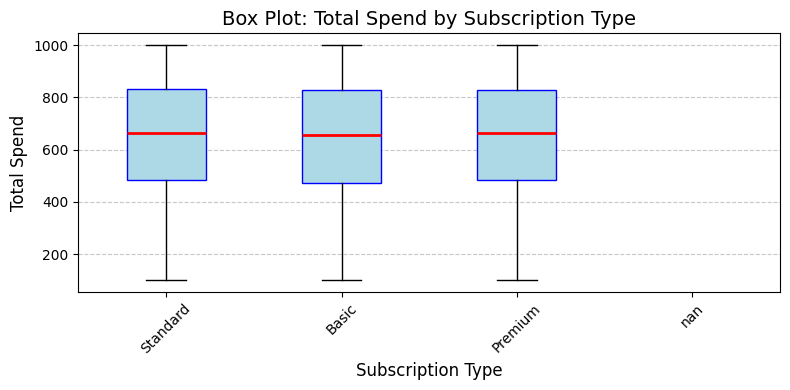

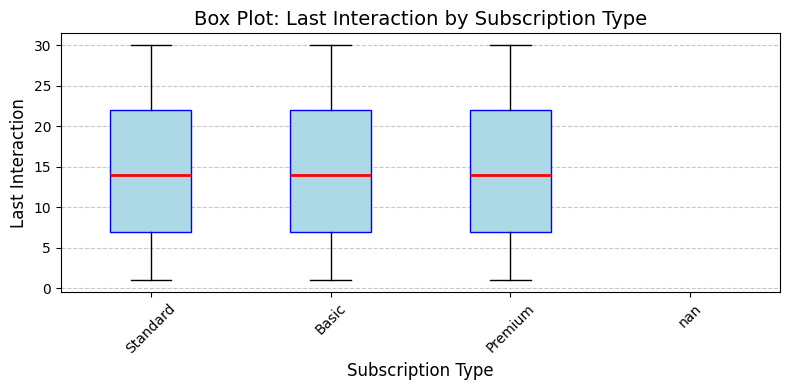

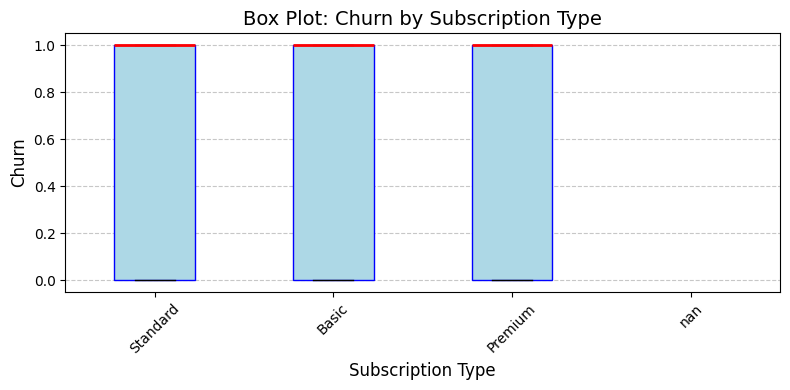

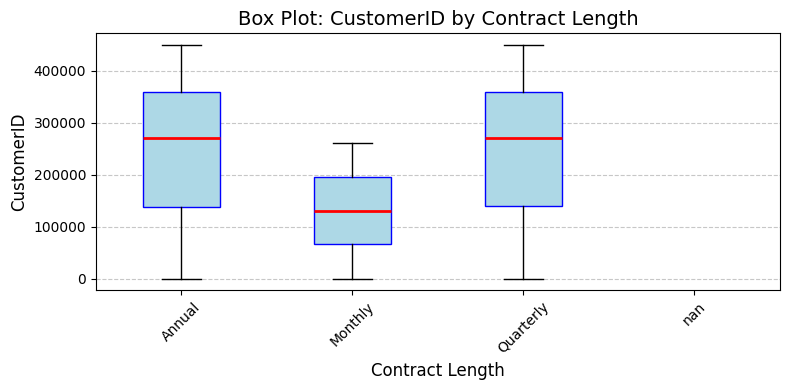

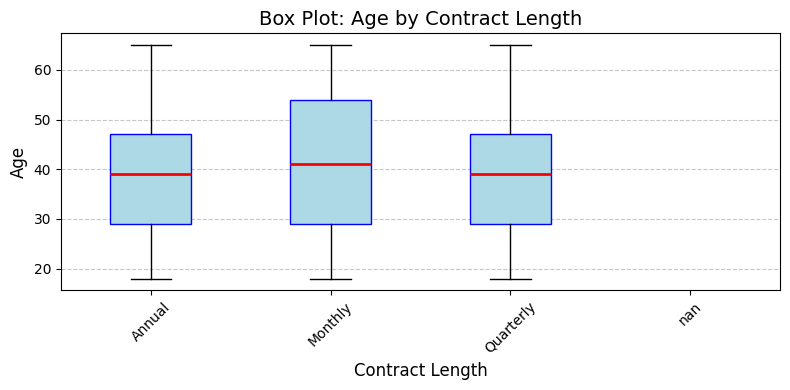

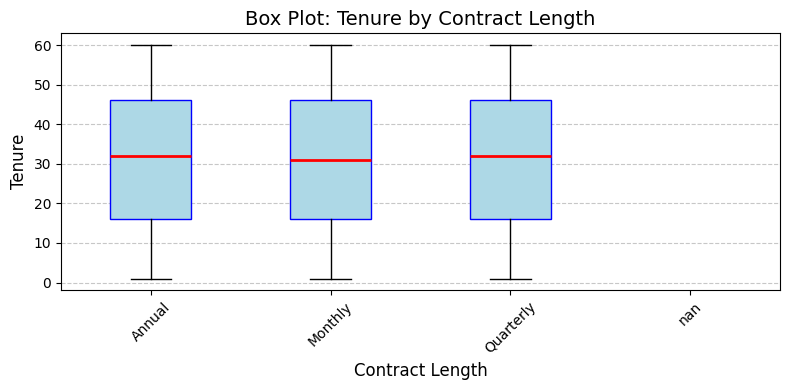

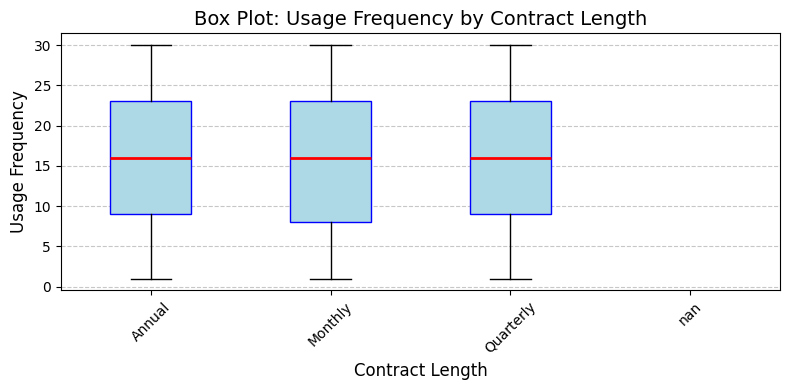

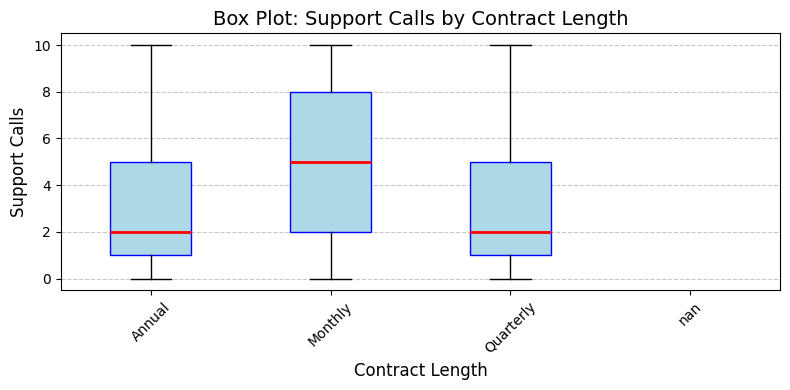

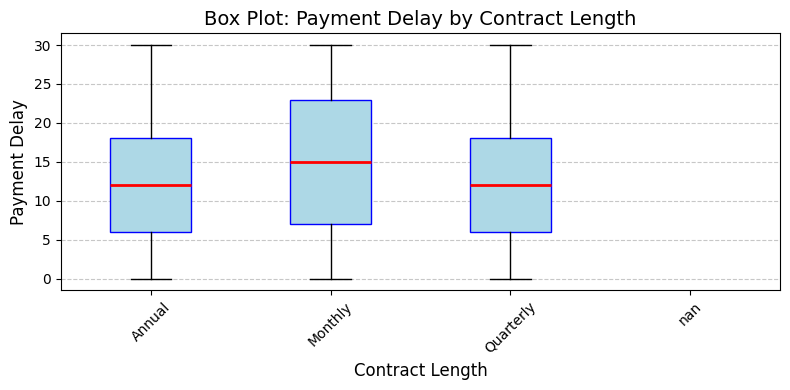

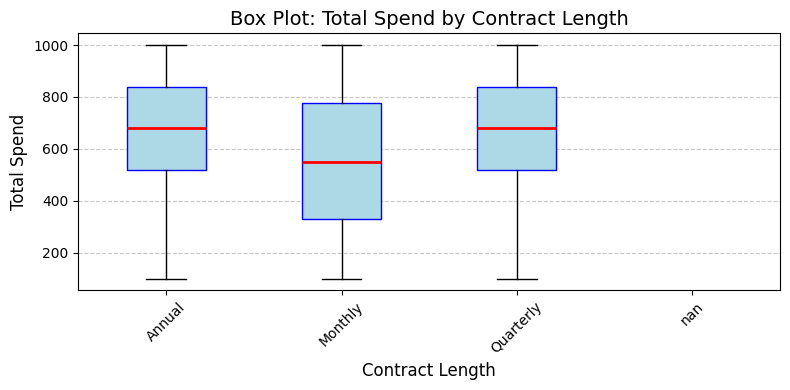

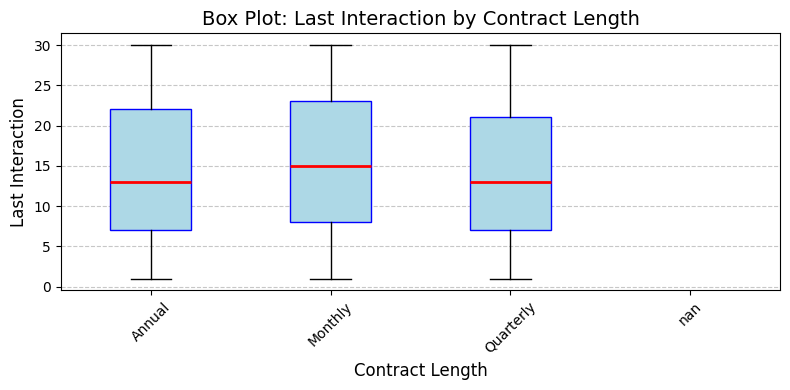

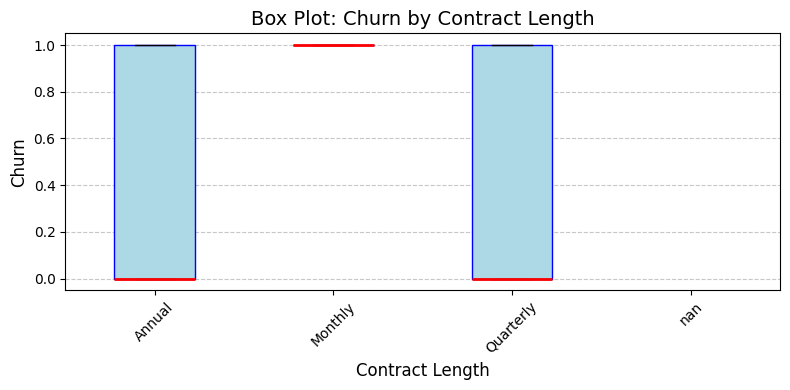

In [14]:

# Loop through categorical and numeric columns
for cat_col in categorical_cols:
    for num_col in numeric_cols:
        plt.figure(figsize=(8, 4))

        # Create a box plot using Matplotlib
        data_to_plot = [data[data[cat_col] == category][num_col] for category in data[cat_col].unique()]
        plt.boxplot(data_to_plot, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'),
                    medianprops=dict(color='red', linewidth=2))

        # Add labels and title
        plt.title(f'Box Plot: {num_col} by {cat_col}', fontsize=14)
        plt.xlabel(cat_col, fontsize=12)
        plt.ylabel(num_col, fontsize=12)
        plt.xticks(ticks=range(1, len(data[cat_col].unique()) + 1),
                   labels=data[cat_col].unique(), rotation=45, fontsize=10)

        # Grid and layout adjustments
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

## ***Bivariate Analysis - Categorical vs Categorical (Stacked Bar Plot)***

<Figure size 800x600 with 0 Axes>

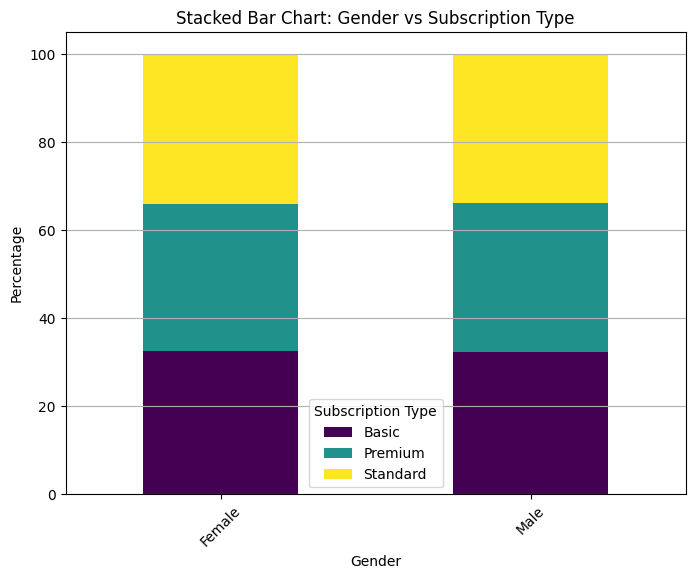

<Figure size 800x600 with 0 Axes>

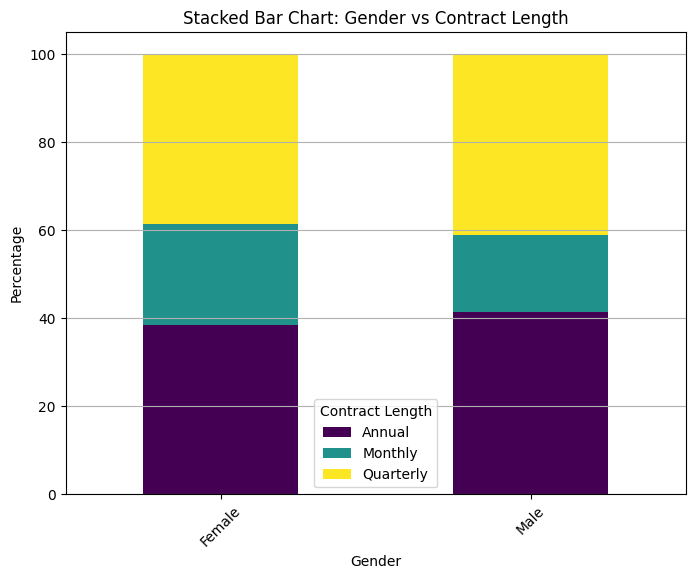

<Figure size 800x600 with 0 Axes>

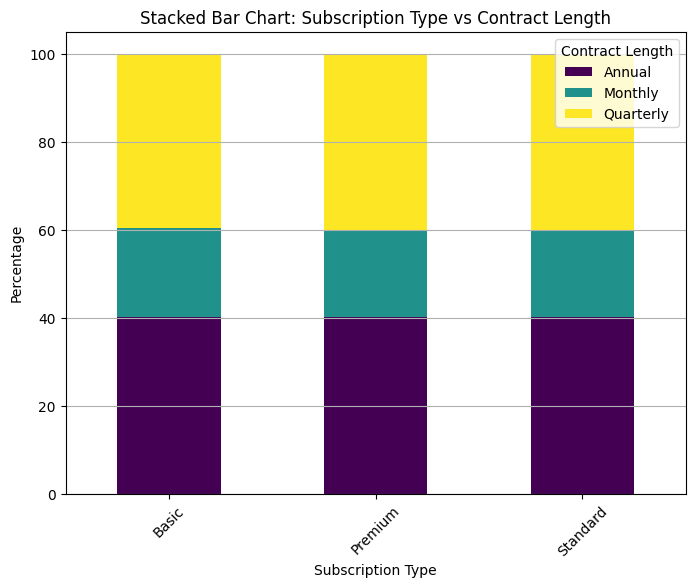

In [15]:
for i, cat_col1 in enumerate(categorical_cols):
    for cat_col2 in categorical_cols[i + 1:]:
        plt.figure(figsize=(8, 6))
        crosstab = pd.crosstab(data[cat_col1], data[cat_col2], normalize='index') * 100
        crosstab.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
        plt.title(f'Stacked Bar Chart: {cat_col1} vs {cat_col2}')
        plt.xlabel(cat_col1)
        plt.ylabel('Percentage')
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.show()

## ***Multivariate Analysis***

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

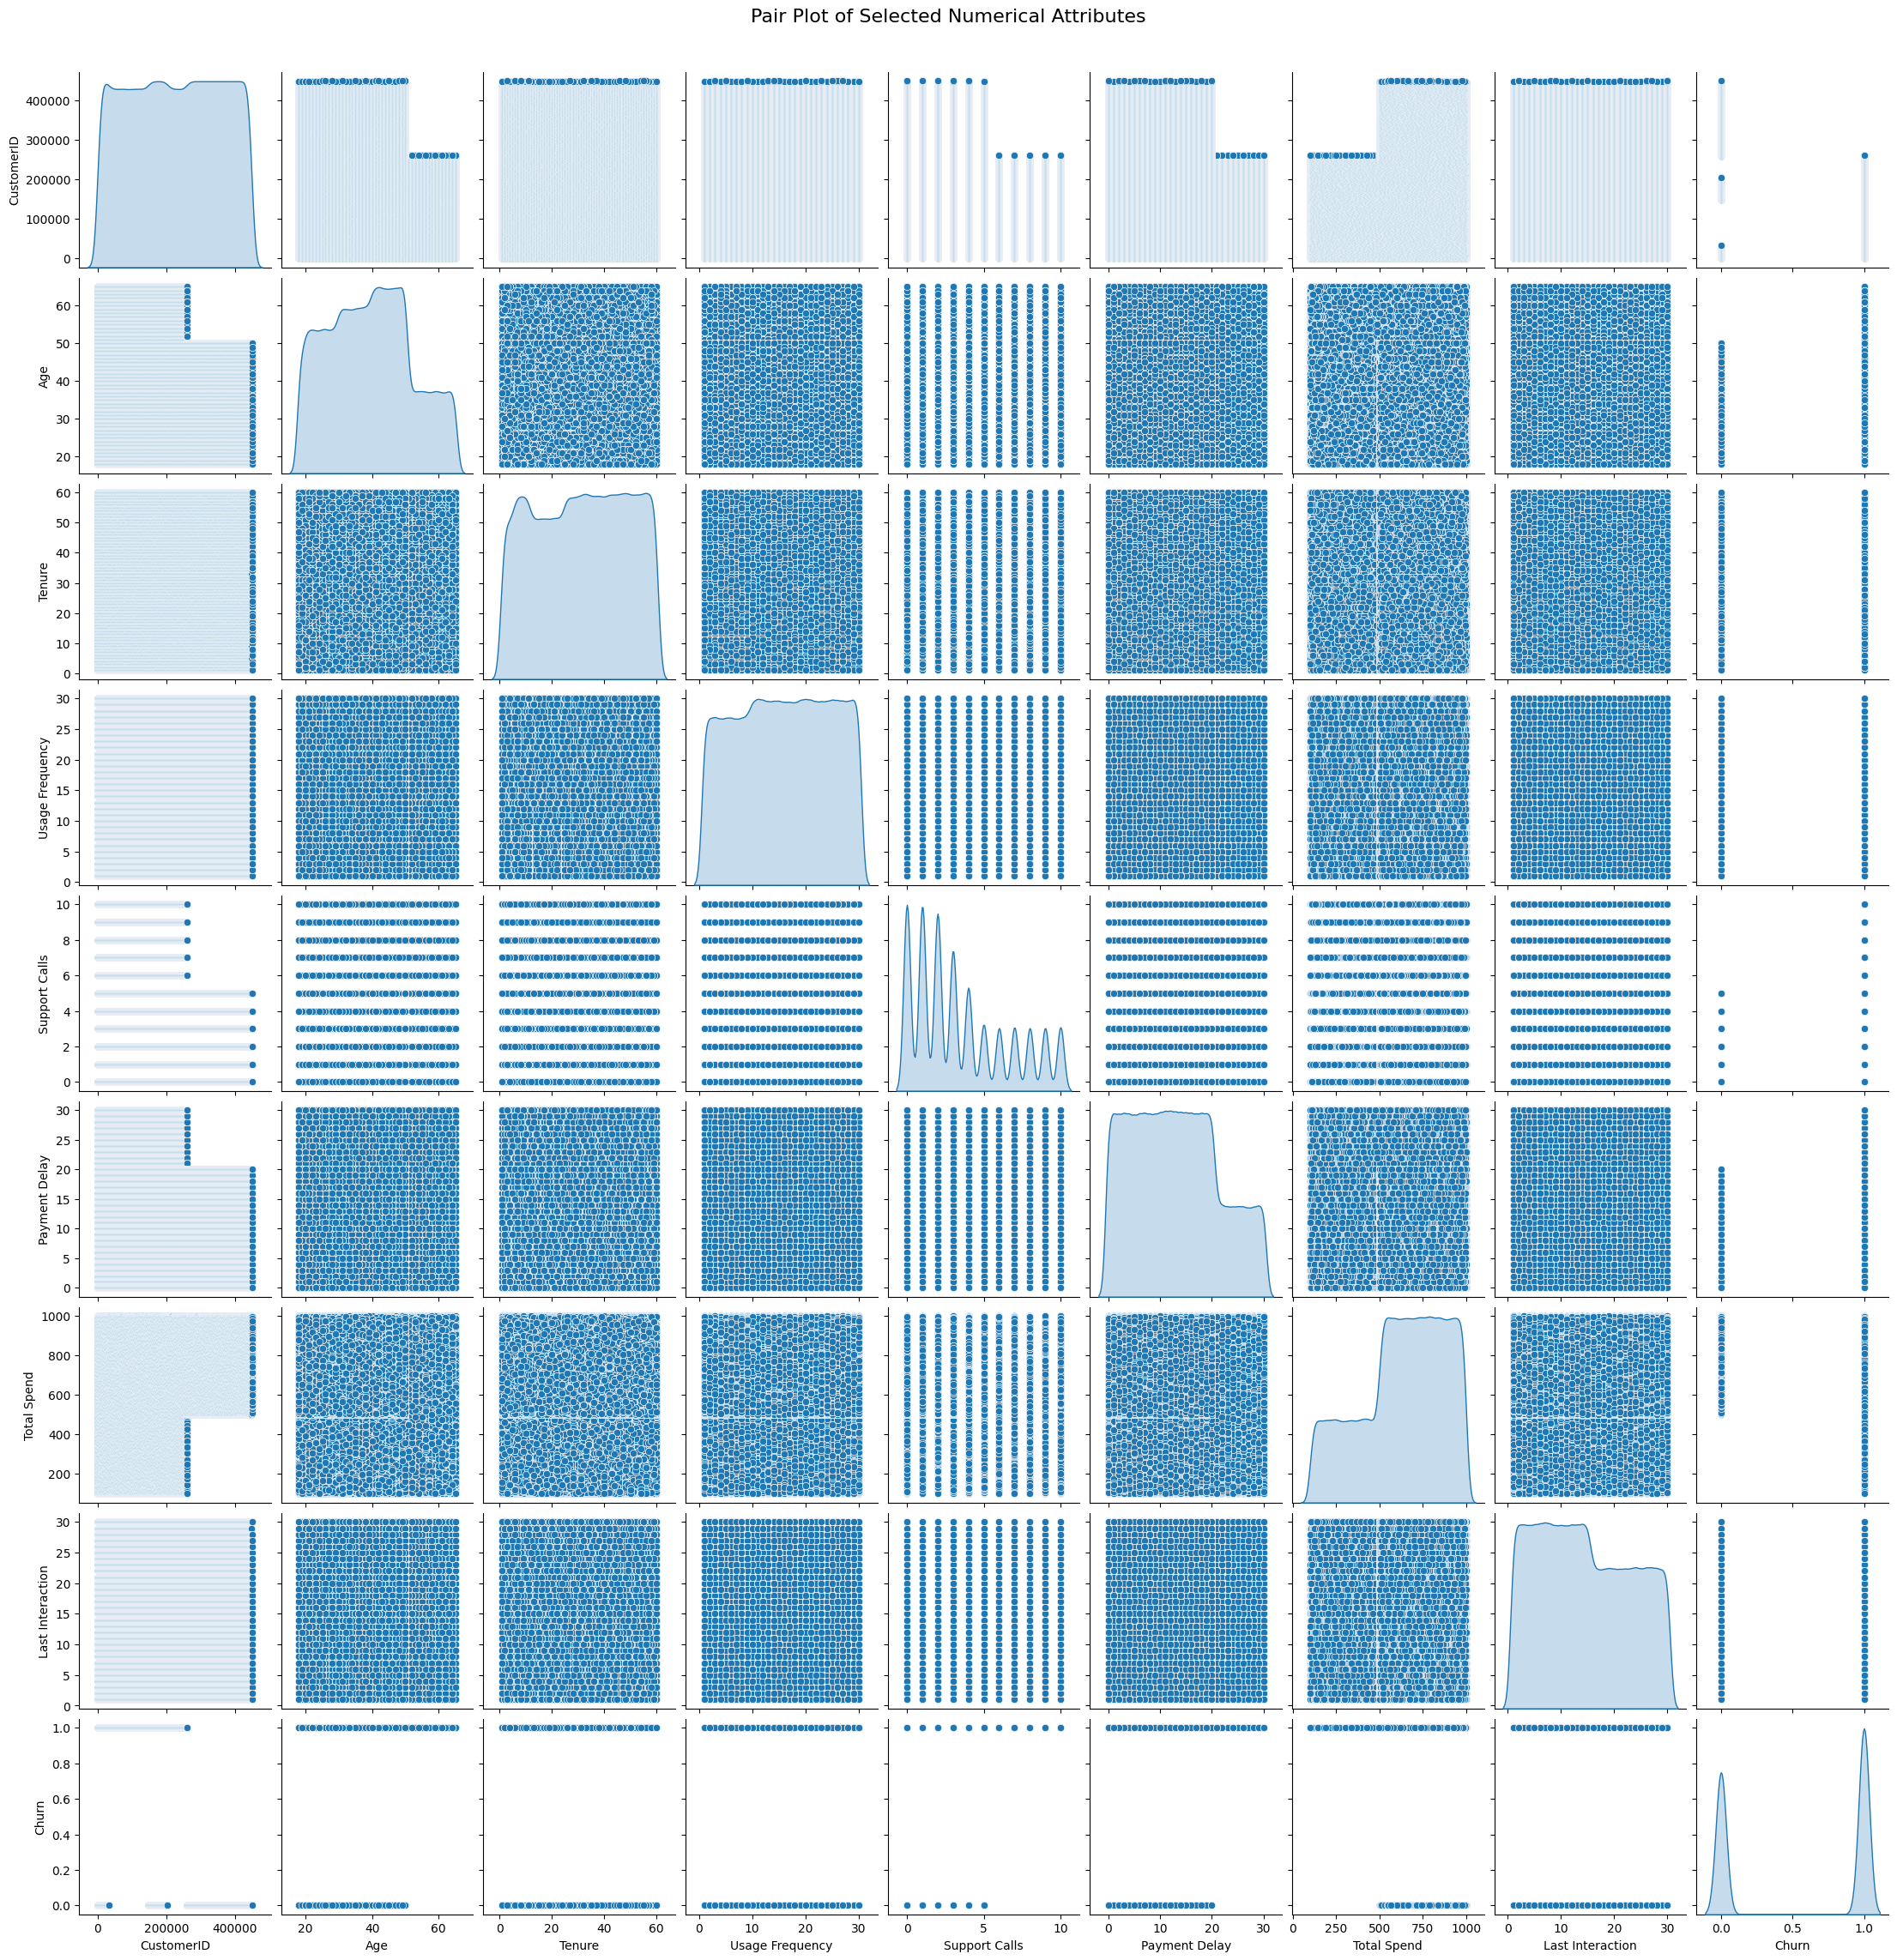

In [19]:
# Corrected list of selected numeric columns
sns.pairplot(df[numeric_cols], diag_kind="kde", palette="husl")
plt.suptitle("Pair Plot of Selected Numerical Attributes", y=1.02, fontsize=16)
plt.show()


In [21]:
df.columns


Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

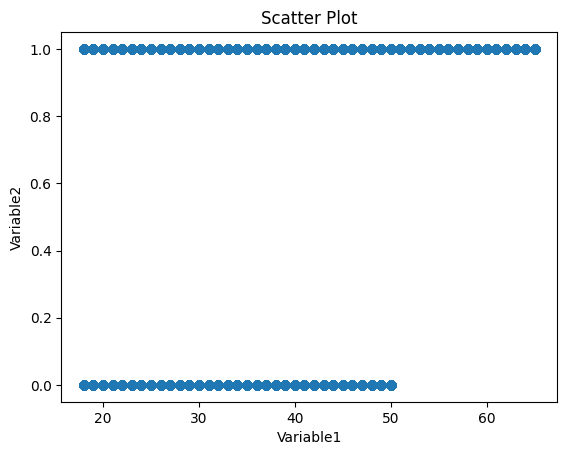

In [22]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'], df['Churn'])
plt.xlabel('Variable1')
plt.ylabel('Variable2')
plt.title('Scatter Plot')
plt.show()
